In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
y = []
a = ["plus", "minus"]
for j in a:
    l = os.listdir(f'./{j}')
    for i in l:
        y.append(j)

In [3]:
import pandas as pd
y = pd.Series(y)
y.value_counts()

minus    12294
plus      9251
dtype: int64

In [4]:
img = []
y = []
for j in range(10):
    l = os.listdir(f'./{j}')
    for i in l:
        img.append(np.array(Image.open(f'./{j}/{i}')))
        y.append(j)

In [6]:
import pandas as pd
y = pd.Series(y)
y.value_counts()

1    8649
2    8573
3    3509
4    3288
0    2225
9    2199
6    2067
8    1964
7    1862
5    1623
dtype: int64

In [2]:
l = os.listdir("./0")

In [4]:
l[:-100]

['7_51800.jpg',
 '7_60185.jpg',
 '7_57069.jpg',
 '7_42857.jpg',
 '7_937.jpg',
 '7_24855.jpg',
 '7_49204.jpg',
 '7_53089.jpg',
 '7_57992.jpg',
 '7_46182.jpg',
 '7_89689.jpg',
 '7_46145.jpg',
 '7_53808.jpg',
 '7_44697.jpg',
 '7_57518.jpg',
 '7_43770.jpg',
 '7_40226.jpg',
 '7_111890.jpg',
 '7_11016.jpg',
 '7_51219.jpg',
 '7_60133.jpg',
 '7_45160.jpg',
 '7_65001.jpg',
 '7_15936.jpg',
 '7_18586.jpg',
 '7_2091.jpg',
 '7_28775.jpg',
 '7_17016.jpg',
 '7_58911.jpg',
 '7_63746.jpg',
 '7_47673.jpg',
 '7_46184.jpg',
 '7_93703.jpg',
 '7_62066.jpg',
 '7_62016.jpg',
 '7_51214.jpg',
 '7_71246.jpg',
 '7_104292.jpg',
 '7_98012.jpg',
 '7_25147.jpg',
 '7_17929.jpg',
 '7_1148.jpg',
 '7_80351.jpg',
 '7_45310.jpg',
 '7_89345.jpg',
 '7_75311.jpg',
 '7_9556.jpg',
 '7_13644.jpg',
 '7_51598.jpg',
 '7_39914.jpg',
 '7_16860.jpg',
 '7_100613.jpg',
 '7_46533.jpg',
 '7_43675.jpg',
 '7_38282.jpg',
 '7_50733.jpg',
 '7_112739.jpg',
 '7_26855.jpg',
 '7_16928.jpg',
 '7_52744.jpg',
 '7_55511.jpg',
 '7_55474.jpg',
 '7_13060

In [4]:
img = []
y = []
for j in range(10):
    l = os.listdir(f'./{j}')
    for i in l[:-100]:
        img.append(np.array(Image.open(f'./{j}/{i}')))
        y.append(j)



In [9]:
x_test = []
y_test = []
for j in range(10):
    l = os.listdir(f'./{j}')
    for i in l[-100:]:
        x_test.append(np.array(Image.open(f'./{j}/{i}')))
        y_test.append(j)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [10]:
x_train = np.array(img)
y = np.array(y)

In [12]:
x_test.shape

(1000, 45, 45)

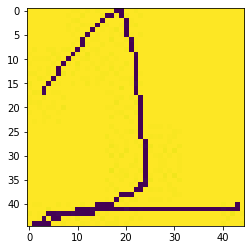

In [14]:
plt.imshow(img[7348])

In [15]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 12

IMG_ROWS, IMG_COLS = 45, 45

In [16]:
import keras.backend as K

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, IMG_ROWS, IMG_COLS)
    x_test = x_test.reshape(x_test.shape[0], 1, IMG_ROWS, IMG_COLS)
    INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
else:
    x_train = x_train.reshape(x_train.shape[0], IMG_ROWS, IMG_COLS, 1)
    x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, 1)
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

Using TensorFlow backend.


In [17]:
x_train.shape

(29313, 45, 45, 1)

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [20]:
from keras.utils import to_categorical

# convert class vectors to binary class matrices
y = to_categorical(y, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [21]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [22]:
y_test.shape

(1000, 10)

In [23]:
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

In [50]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), input_shape =INPUT_SHAPE, activation ='relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Conv2D(32, (3, 3), activation ='relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Conv2D(64, (3, 3), activation ='relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
model.add(Dropout(0.2))
model.add(Flatten()) 
model.add(Dense(128, activation ='relu')) 
model.add(Dense(50, activation ='relu')) 
model.add(Dense(NUM_CLASSES, activation ='softmax')) 

In [51]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 43, 43, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 19, 19, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 3, 64)         

In [53]:
model.fit(x_train, y,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 29313 samples, validate on 1000 samples
Epoch 1/12
29313/29313 [==============================] - 19s 657us/step - loss: 0.8886 - accuracy: 0.7098 - val_loss: 0.5103 - val_accuracy: 0.8360
Epoch 2/12
29313/29313 [==============================] - 18s 619us/step - loss: 0.2173 - accuracy: 0.9353 - val_loss: 0.2702 - val_accuracy: 0.9160
Epoch 3/12
29313/29313 [==============================] - 19s 645us/step - loss: 0.1429 - accuracy: 0.9572 - val_loss: 0.2212 - val_accuracy: 0.9320
Epoch 4/12
29313/29313 [==============================] - 19s 648us/step - loss: 0.1108 - accuracy: 0.9677 - val_loss: 0.1311 - val_accuracy: 0.9630
Epoch 5/12
29313/29313 [==============================] - 19s 647us/step - loss: 0.0927 - accuracy: 0.9725 - val_loss: 0.1169 - val_accuracy: 0.9660
Epoch 6/12
29313/29313 [==============================] - 19s 638us/step - loss: 0.0759 - accuracy: 0.9770 - val_loss: 0.1185 - val_accuracy: 0.9600
Epoch 7/12
29313/29313 [==============================] -

In [92]:
l = os.listdir("./9")

In [93]:
a = np.array(Image.open(f'./{9}/{l[800]}'))

In [94]:
a

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [34]:
y_pred = np.array(model.predict_classes(x_test))

In [29]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [31]:
from sklearn.metrics import accuracy_score

In [42]:
y_true = []
for j in range(10):
    l = os.listdir(f'./{j}')
    for i in l[-100:]:
        y_true.append(j)
y_true = np.array(y_true)

In [44]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [39]:
y_pred.shape

numpy.ndarray

In [45]:
accuracy_score(y_true, y_pred)

0.973